# Recurrent Neural Networks (RNN): Redes Neuronales Recurrentes.
* Hasta el momento todas las ANN que hemos usado son superfvisadas.Y en este caso tambien. Pero pronto veremos ANN no supervisadas, o semi-supervisadas, o auto-supervisadas (self-supervised).

* Las RNN son el precursor de las LLM (Large Language Models) junto con las LSTM (Long-short-term-memory) que las veremos en la proxima clase.

* Se usan para secuencias.
    * Texto
    * Audio (secuencial)
    * Traduccion

* Fueron inventadas por Jürgen Schmidbuber (alemán) y su equipo en 1980s. Sin embargo se basaron en un trabajo anterior por John Hopfield y David Rumelhart (referencia en las notas de clase).

[35] John J. Hopfield. Neural networks and physical systems with emergent collective com-
putational abilities. Proceedings of the National Academy of Sciences, 79(8):2554–2558,
1982.

* Para introducir las RNN, usé un video de
[Luis Serrano](https://www.youtube.com/watch?v=UNmqTiOnRfg).

Lo que voy a mostrar es una adapatación de este video pero al siguiente problema:

Supongamos que un vendedor deber recorrer tres ciudades
(A: Armenia, B: Bogotá, C: Cali).

La idea es que las va recorirrer en este orden $A-B-C$.
Queremos formular un modelo que nos indice este proceso.
Ahora, si el vendedor esta en $C$ debe ir a $A$.

Para esto identificamos las ciudades como "hot encoded vectors".

$$
A \mapsto \begin{pmatrix} 1 \\ 0 \\ 0 \end{pmatrix}  \quad , \quad
B \mapsto \begin{pmatrix} 0 \\ 1 \\ 0 \end{pmatrix}  \quad , \quad
C \mapsto \begin{pmatrix} 0 \\ 0 \\ 1 \end{pmatrix}  \quad , \quad
$$



El modelo es muy simple y se resume en la matriz $M$
$$
M  =
\begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
$$
 Verfiquemos que este modelo funciona.

\begin{eqnarray}
MA  = \begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
1 \\ 0 \\ 0
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix} = B  \\
MB  = \begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0
\end{pmatrix}
\begin{pmatrix}
0 \\ 1 \\ 0
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix} = C  \\
MC= \begin{pmatrix}
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 &  0  \\
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 0 \\ 0  
\end{pmatrix}
= A
\end{eqnarray}




Gráficamente tenemos

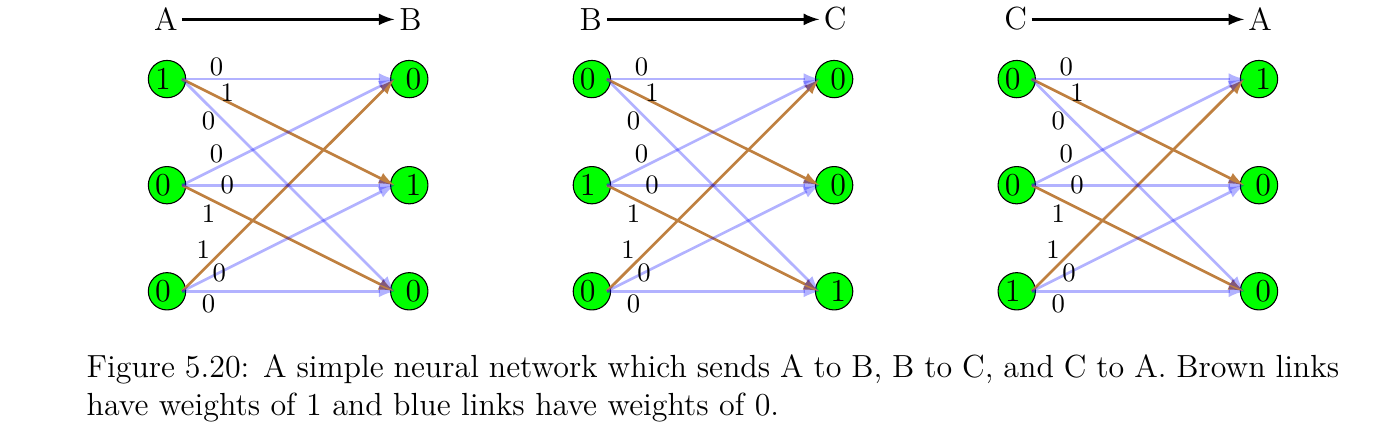

En resumen:


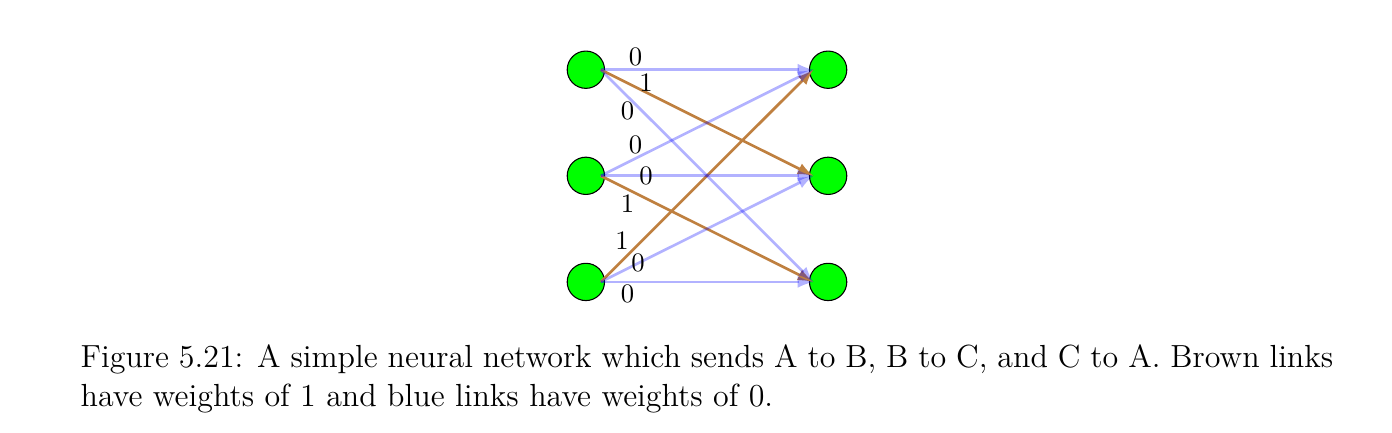

Que tal si quieremos un modelo de la forma $A-B-C-A-B-C-A-B-C....$
Para esto introducimos la palabra **recurrente**.

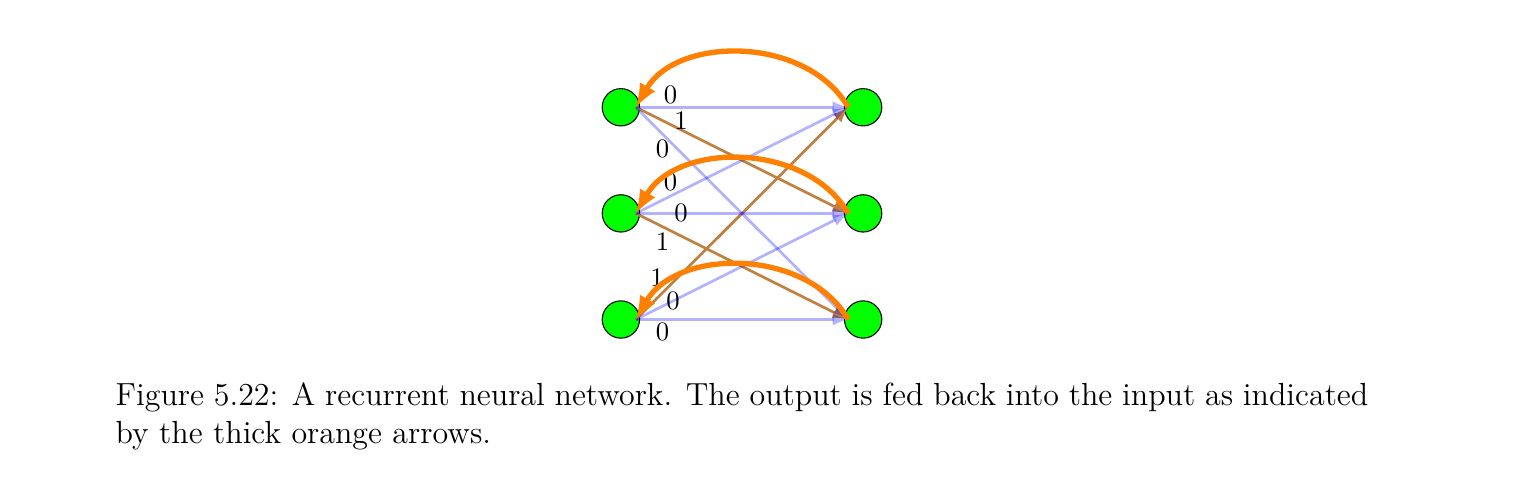

Vamos a complicar aún mas este problema.  Asumamos que el vendedor se va a querdar una noche más en alguna de las ciudades. Es decir, el modelo podría ser

$$A-B-B-C-A-A-A-B-B-C... $$

Para esto introducimos dos nuevos "hot endcoded vectors"

$$\text{stay} \mapsto \binom{1}{0}  $$
$$\text{leave} \mapsto \binom{0}{1}  $$



Para poder incluir la opción de quedarse necesitamos ampliar, o redefinir la matriz $M$

$$
M=
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
--&--&-- \\
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
\end{pmatrix}
$$

Como ejemplo vamos a asumir que el vendedor se quiere quedar un día mas en la ciudad de Cali (C).

Quien es $MC$?

$$
MC =
\begin{pmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
--&--&-- \\
0 & 0 & 1 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 0  \\ 1 \\ -- \\ 1 \\ 0 \\ 0
\end{pmatrix}
\implies
\binom{\text{stay}}{\text{leave}} \tag{1}
$$


Para poder resolver el problema de "stay - leave" necesitamos una matriz mas


$$
\text{stay-leave} =
\begin{pmatrix}
1 & 0  \\ 1 & 0  \\ 1 & 0  \\ - & -  \\ 0 & 1 \\ 0 & 1 \\ 0 & 1
\end{pmatrix}
$$

Observamos el prodcuto de "stay-leave" por "stay" y por "leave"

$$
(\text{stay-leave}) (\text{stay})
=
\begin{pmatrix}
1 & 0   \\ 1 & 0  \\ 1 & 0 \\ -  & -  \\ 0 & 1 \\ 0 &1 \\ 0 & 1
\end{pmatrix}
\binom{1}{0}
= \begin{pmatrix}
1 \\ 1 \\ 1 \\ - \\ 0 \\ 0 \\ 0  
\end{pmatrix} \tag{2} $$

$$
(\text{stay-leave}) (\text{leave})
=
\begin{pmatrix}
1 & 0   \\ 1 & 0  \\ 1 & 0 \\ -  & -  \\ 0 & 1 \\ 0 &1 \\ 0 & 1
\end{pmatrix}
\binom{0}{1}
= \begin{pmatrix}
0 \\ 0 \\ 0 \\ - \\ 1 \\ 1 \\ 1
\end{pmatrix}
$$

Con todos estos elementos el algoritmo del modelo es el siguiente:

1. Calcule la salida $MC$ y la salida de (stay-leave)(stay). Esto ya se hizo y son las Ecuaciones (1)   y la (2).

$$
MC =
\begin{pmatrix}
0 \\ 0 \\ 1 \\ 1 \\ 0 \\  0
\end{pmatrix}
\quad, \quad
( \text{stay-leave}) ( \text{stay}) =
\begin{pmatrix}
1 \\ 1 \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$


2. Sume los dos resultados anteriores

$$MC + ( \text{stay-leave}) (\text{stay}) =
\begin{pmatrix}
0 \\ 0 \\ 1 \\ 1 \\ 0 \\  0
\end{pmatrix}
+
\begin{pmatrix}
1 \\ 1 \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
=
\begin{pmatrix}
1 \\ 1 \\ 2 \\ 1 \\ 0 \\ 0
\end{pmatrix}
 $$

3. Aplicar un filtro no lineal. El filtro asigna 1 al maximo valor del vector resultante y cero a los demás.  El filtro da como resultado

$$
H=
\begin{pmatrix}
0 \\ 0  \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
$$

4. El último paso es aplicar una multiplicacion de una matriz $Q$ por este vector.

La matriz  $Q$ es
$$
\begin{pmatrix}
1 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
\end{pmatrix}
$$
Veamos que pasa cuando multiplicamos $Q$ por  $C$

$$
QH =
\begin{pmatrix}
1 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
0 \\ 0  \\ 1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 0 \\ 1
\end{pmatrix}
=C
$$



El sentido de la martriz $Q$ se puede entender de la siguiente forma

$$
\begin{pmatrix}
1 & 0 & 0 & 1 & 0 & 0 \\
0 & 1 & 0 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ x_3 \\ y_1 \\ y_2 \\ y_3
\end{pmatrix}
=
\begin{pmatrix}
x_1 + y_1 \\
x_2 + y_2 \\
x_3 + y_3 \\
\end{pmatrix}
$$

Este es el modelo de los vendedores que recorren tres ciudades y pueden quedarse varios dias en alguna. Veamos la arquitectura en la Figura 5.23.

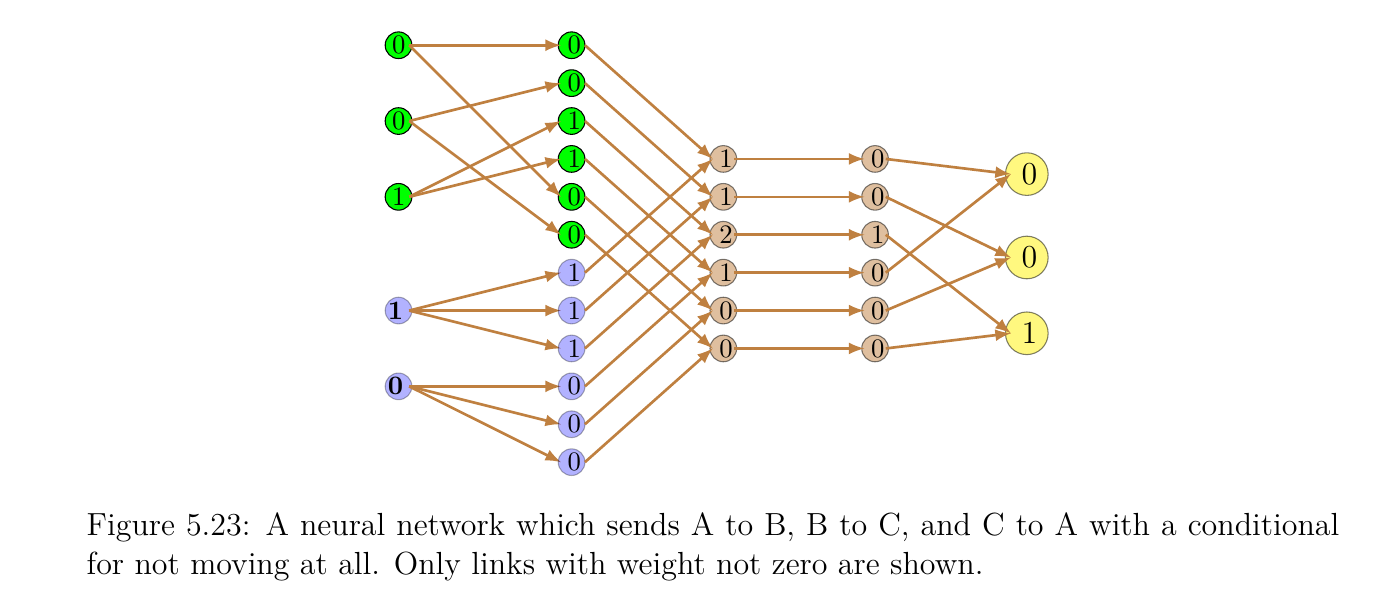

Igual que antes, que pasa si queremos iterar, del final volver al principio de forma iterativa (recurrent).

Para esto  podemos pensar en la Figugra 5.24

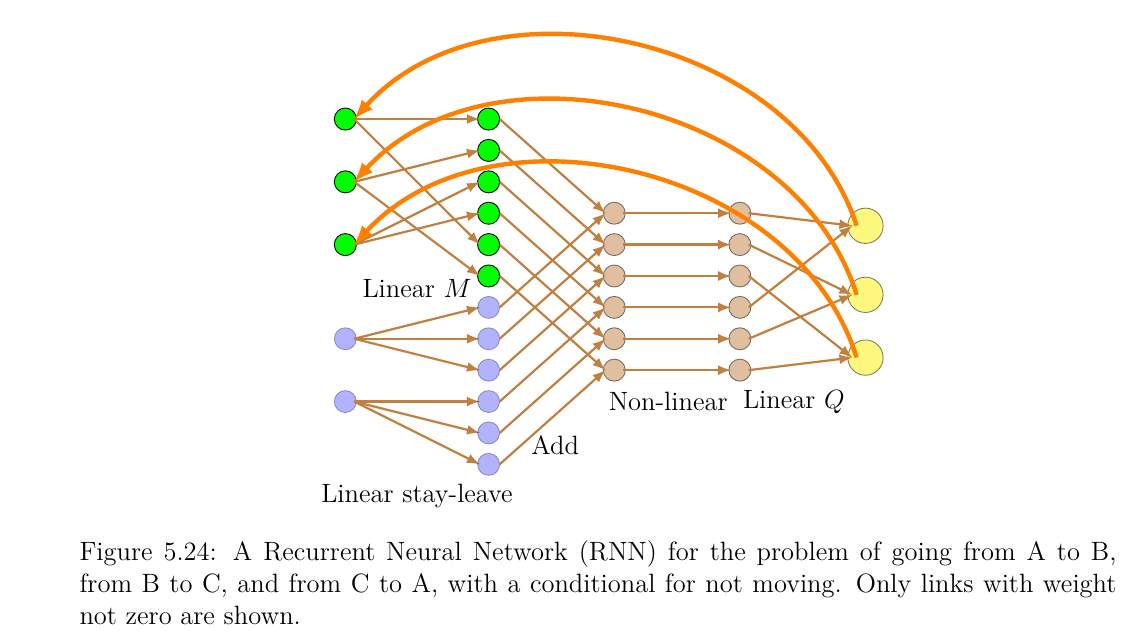

Con esta introducción describimos las RNN.

La arquitectura de las RNN la mostramos en lla Figura 5.25.

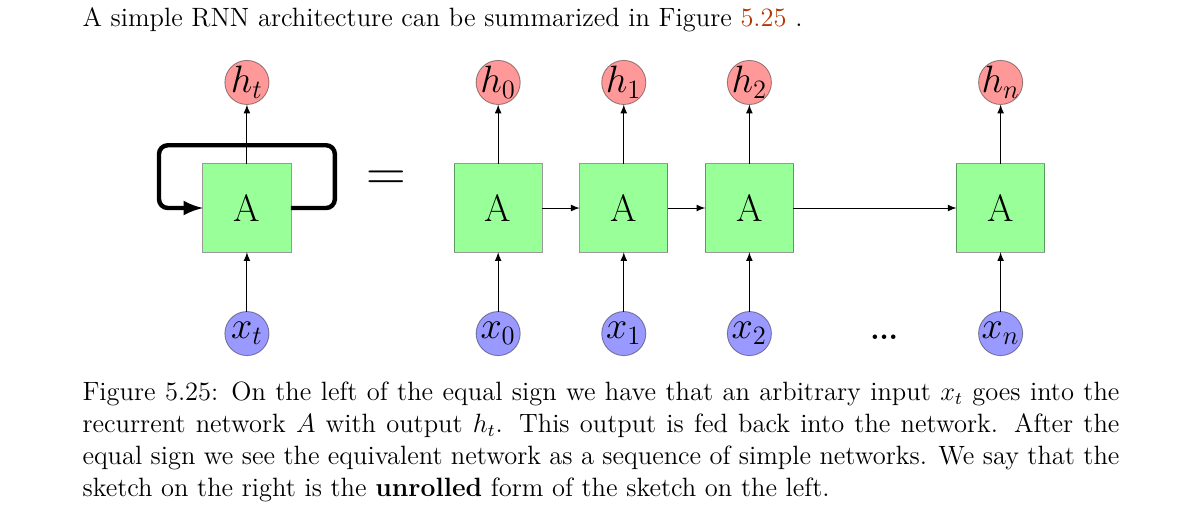

El modelo matemático es:

$$h_t = f_\Theta(h_{t-1}, x_t) $$

El pseudo-código para esto sería

```
h=0
for i in range(n):
    x_i = input_data_i
    h = f( np.dot(Theta_x, x_i) + np.dot(Theta_h, h_i)
```

Hay varios tipos de redes recurrentes. Por ejemplo la Figura 5.26

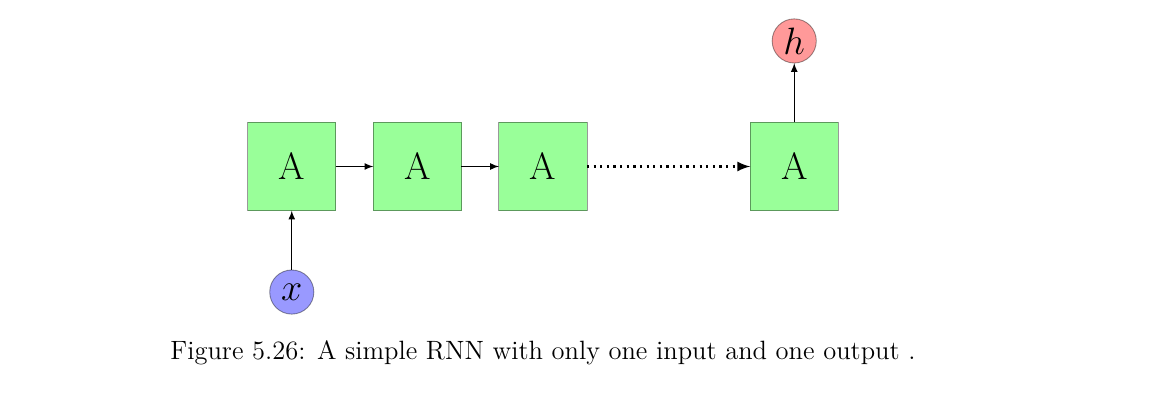

Donde solo hay una entrada y una salida.

La Figura 5.27 muestra un caso, un poco mas complejo.

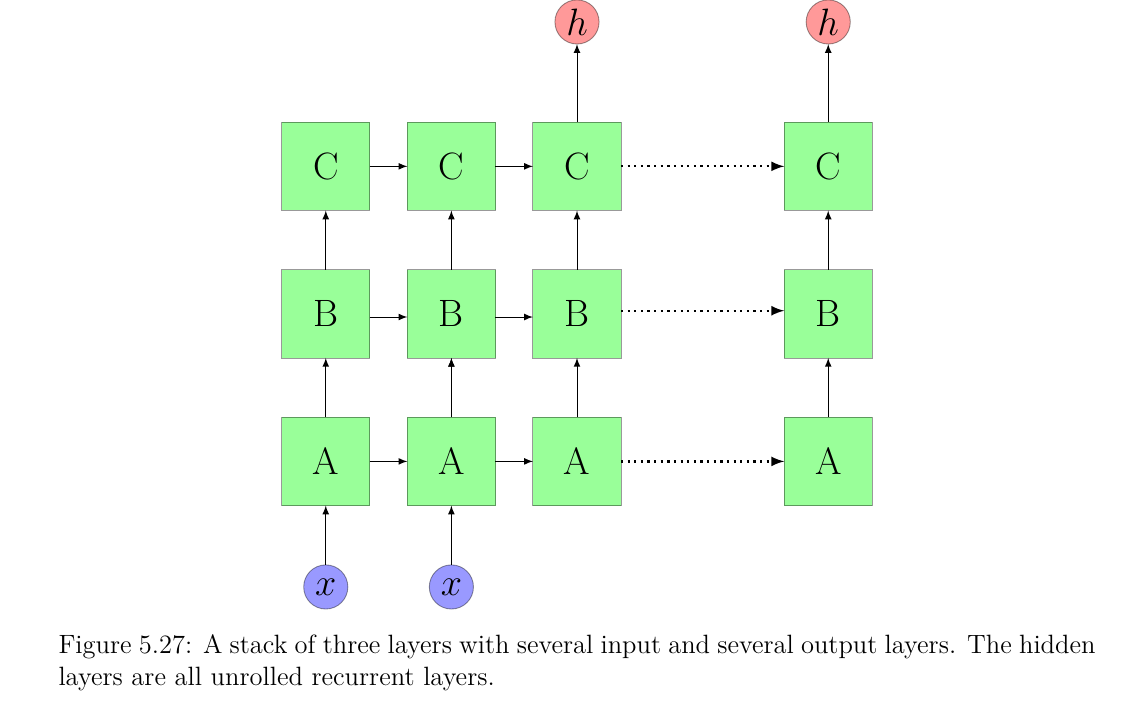

donde se observa thres capas con varias entradas y salidas.

Las redes convolucionales, ni las MLP sirven para este tipo de procesos por que en esas el orden no importa. Aca si, por que son secuenciales.

El parametro $\Theta$ no cambia, hasta tanto no consideremos una nueva época.

En general hay varios tipos de RNNs

1. Varias entradas varias salidas. En inglés **many-to-many**. Por ejempo la 5-25 y 5-27
2. Una entrada y una salida solamente. 5.26.
3. Muchas entradas y una sola salida. ESte es el caso de responder "si" o "no" a una cantidad de parámetros.
4. Una entrada y varias salidas. Por ejemplo la descripción de una imágen.

# Gradiente de las RNN.
8:00 pm.
Sabemos desde el curso de ML que el gradiente (backpropagation) es el alma detrás de las redes neuronales.

Para el análisis del gradiente usaremos la Figura 5.28

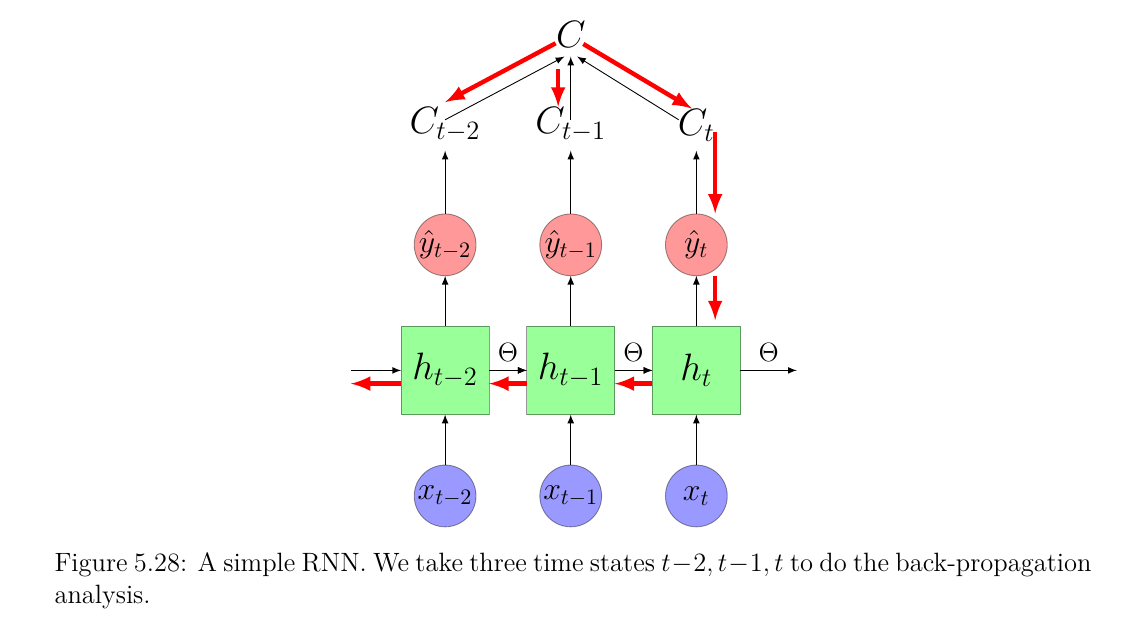

Podemos pensar en la función de costo como


$$ C= \frac{1}{T} \sum_{t=1}^T C_t $$

* Este proceso se conoce como BackPropagatgion through Time
[BPTT](https://en.wikipedia.org/wiki/Backpropagation_through_time).
Las ideas que expongo acá estan basadas en el texto
[Drive Into Deep Learning](https://d2l.ai/chapter_recurrent-neural-networks/bptt.html)



Comenzamos por describir el modelo matemático

$$h_t = f(x_t, h_{t-1}, \theta_x, \theta_h) \tag{3} $$
Digamos que $f$ es una activación como logistic sigmoid or tanh  o ReLU, etc.
de igual forma

$$\hat{y}_t = g(h_t, \theta_y) $$
Digamos que $g$ es una softmax.

Tenemos que hallar

$$\frac{\partial C_k}{\partial \theta_h} \quad , \quad  
\frac{\partial C_k}{\partial \theta_x}  \quad , \quad
\frac{\partial C_k}{\partial \theta_y} \tag{4} $$

Recordamos del apéndice la regla de la cadena. De La Figura 5.28
$$C_k(y_{t}(h_t)) $$
La regla de la cadena para $C_k$ como función de $h_t$ está dada por

$$ \frac{\partial C_k}{\partial h_t} = \sum_i \frac{\partial C_k}{\partial \hat{y}_{ti}} \frac{\partial \hat{y}_{ti}}{\partial h_t}=
\frac{\partial C_k}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial h_t} =  \left (\frac{\partial C_k}{\partial \hat{y}_t} \right )^T \frac{\partial \hat{y}_t}{\partial h_t}.$$

En general abusando de la notación (no escribo el $^T$ )

$$\frac{\partial C_k}{\partial h_t} = \frac{\partial C_k}{\partial \hat{h}_t} \frac{\partial \hat{y}_t}{\partial h_t}.$$

Como el gradiente para el "backpropagation" es con respecto a $\theta$, estimemos primero de los gradientes en (4).

$$\frac{\partial C_k}{\partial \theta_h} = \frac{\partial C_k}{\partial \hat{y}_t} \frac{\partial \hat{y}_t}{\partial h_t} \frac{\partial h_t}{\partial \theta_h} $$

Las dos primeras derivadas de la derecha no son complicadas por que tanto $C_k$ como $g=\hat{y}_t$ son funciones analíticas (funcion de costo y función de activación). Aca lo dificil es $\partial h_t / \partial \theta_h$.
Por que es dificil? por la recursión. $h_t=f(h_{t-1}, ... )$.


$$\frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} + \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial \theta_h} \tag{5} $$

Para poder entender esta recursividad mejor, escribimos (notación)

$$a_t = b_t + c_t a_{t-1}  \tag{6}$$
donde
$$a_t = \frac{\partial h_t}{\partial \theta_h} \quad, \quad b_t= \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h}
\quad , \quad c_t =  \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}} $$

Queremos "desenrollar" la Ecuación (6).

Para comenzar asumismos que $a_0=0$
\begin{eqnarray}
a_1 &=& b_1 \\
a_2 &=& b_2 + c_2 a_1 = b_2 + c_2 b_1 \\
a_3 &=& b_3 + c_3 a_2 = b_3 + c_3 (b_2 + c_2 b_1) = b_3 + c_3 b_2 + c_3 c_2 b_1 \\
a_4 &=& b_4 + c_4 a_3 = b_4 + c_4 (b_3 + c_3 b_2 + c_3 c_2 b_1) = b_4 + c_4 b_3 + c_4 c_3 b_2 + c_4 c_3 c_2 b_1 \\
&\vdots&  \\
a_t &=& b_t + \sum_{i=1}^{t-1} b_i \prod_{j=i+1}^t c_j.
\end{eqnarray}

Con este patrón podemos escribir la Ecuación (5) como

$$\frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} + \sum_{i=1}^{t-1}
\frac{\partial f(x_i, h_{i-1}, \theta_x, \theta_h)}{\partial \theta_h}
\prod_{j=i+1}^t \frac{\partial f(x_j, h_{j-1}, \theta_x, \theta_h)}{\partial h_{j-1})} \tag{7} $$


Verifiquemos
Asumamos el primer caso $a_0=0$. Si $t=1$.

$$h_1 = f(x_1, h_0, \theta_x, \theta_h) $$

Si tomamos la derivada

$$\frac{\partial h_1}{\partial \theta_h} = \frac{\partial f(x_t, 0, \theta_x, \theta_h)}{\partial \theta_h} $$
Si nos vamos a la Formula (7),

Voviendo a la Ecuación (4) falta

$$\frac{\partial C_k}{\partial \theta_x} $$

$$\frac{\partial C_k}{\partial \theta_x} =
\frac{\partial C_k}{\partial \hat{y}_t} \frac{\partial \hat{y}_k}{\partial h_t} \frac{\partial h_t}{\partial \theta_x} \tag{8}
$$

La expresión

$$\frac{\partial C_k}{\partial \hat{y}_t} $$
es analítica y no es problema.

Vamos a ser mas explícitos.

Escribimos de nuevo las ecuaciones para $f,g$ pero ya con pesos matriciales específicos.

Asuma $x_t \in \mathbb{R}^n$, $h_t \in \mathbb{R}^p$, $W \in \mathbb{R}^{m \times n}$, $\theta \in \mathbb{R}^{m \times p}$ y $U \in \mathbb{R}^{q \times p}$.

Entonces

$$f(x_t, h_{t-1}, W, \Theta) = f( W x_t + \Theta h_{t-1}) \tag{9}$$
$$g(h_t, U) = g(U h_t) $$
donde $(\theta_x, \theta_h, \theta_y) = (W, \Theta, U) \tag{10}$

Recuerde la Ecuacion (8). el primer factor no es problema, ya lo discutimos.
Para el segundo factor, recuerde que $g=\hat{y}_k$ es decir

$$\frac{\partial \hat{y}_t}{\partial h_t} = \frac{\partial g}{\partial h_t} $$
De la Ecuacion 10, ver apendice

$$\frac{\partial g}{\partial h_t} = \frac{\partial g}{\partial z} U $$
donde $z=U h_t$.



Volviendo a la Ecuacion (7) queremos $\partial h/\partial \theta_h$. Es decir

$$\frac{\partial f(x_t, h_{t-1}, W, \Theta)}{\partial \theta_h} $$
Llamos el argumento $\xi =  W x_t + \theta h_{t-1}$

$f$ puede ser un vector y pensemos en la componente $r$ de este vector $f_r$

Usando notación de Einstein, suma sobre $j$
$$\frac{\partial f_r}{\partial W} = \frac{\partial f_r}{\partial \xi_j} \frac{\partial \xi_j}{\partial W} \tag{11} $$

Ahora
Como
$$\xi_j = W_{jk} (x_t)_k + \Theta_{jk} (h_{t-1})_k $$

$$\frac{\partial \xi_j}{\partial W_{pq}} =  \delta_{jp} \delta_{kq} (x_t)$$

Reemplazando en la (11)

$$\frac{\partial f_r}{\partial W_{pq}} = \frac{\partial f_r}{\partial \xi_j} \delta_{jp}(x_t)_q  $$

Como faltan unas cosas y se acabo el tiempo, en la proxima clase
terminanos el gradiente.